<a href="https://colab.research.google.com/github/Monica-Restrepo/Challenge1_Data_Science/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



Tienda 1: $1,150,880,400.00
Tienda 2: $1,116,343,500.00
Tienda 3: $1,098,019,600.00
Tienda 4: $1,038,375,700.00


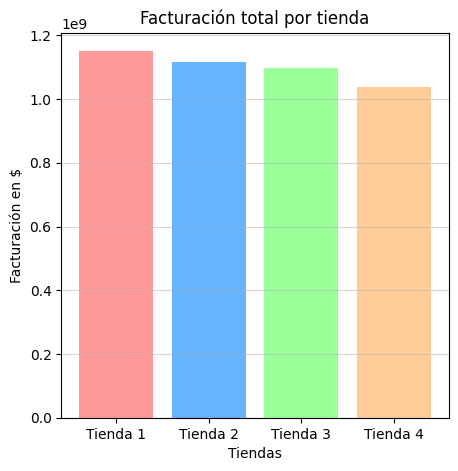

In [5]:
import matplotlib
import matplotlib.pyplot as plt

# Calculamos la facturación total de cada tienda
facturacion = [
    tienda['Precio'].sum(),
    tienda2['Precio'].sum(),
    tienda3['Precio'].sum(),
    tienda4['Precio'].sum()
]

nombres_tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

# Mostramos los totales
for nombre, total in zip(nombres_tiendas, facturacion):
    print(f"{nombre}: ${total:,.2f}")

# Gráfico de barras
colores = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

plt.figure(figsize=(5,5))
plt.bar(nombres_tiendas, facturacion, color=colores)
plt.title('Facturación total por tienda')
plt.ylabel('Facturación en $')
plt.xlabel('Tiendas')
plt.grid(axis='y', linestyle='-', alpha=0.5)
plt.show()

# 2. Ventas por categoría

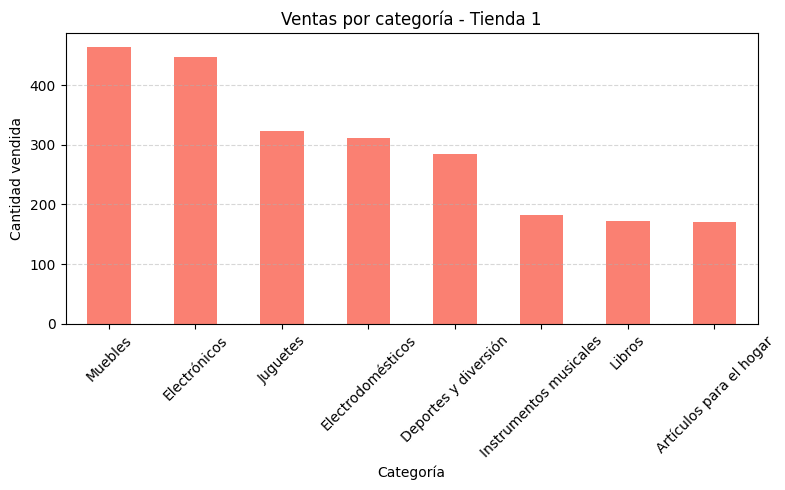

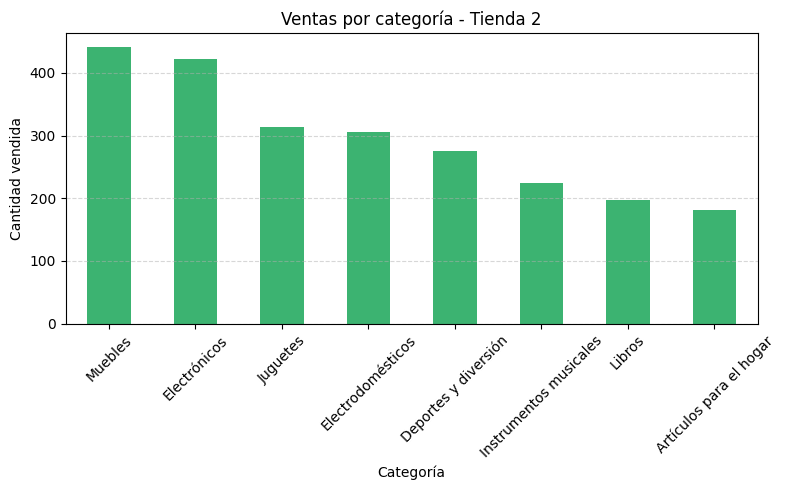

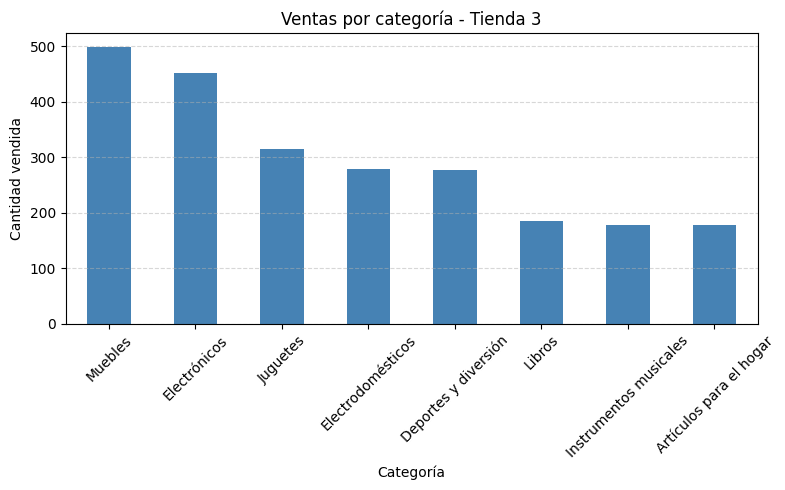

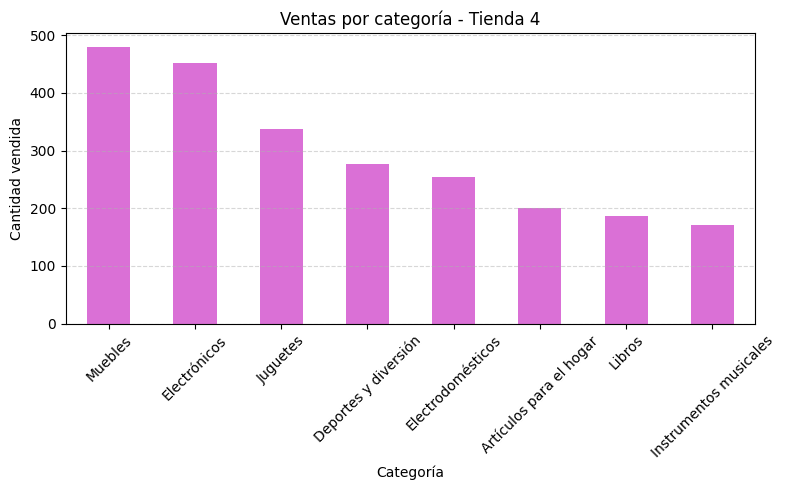

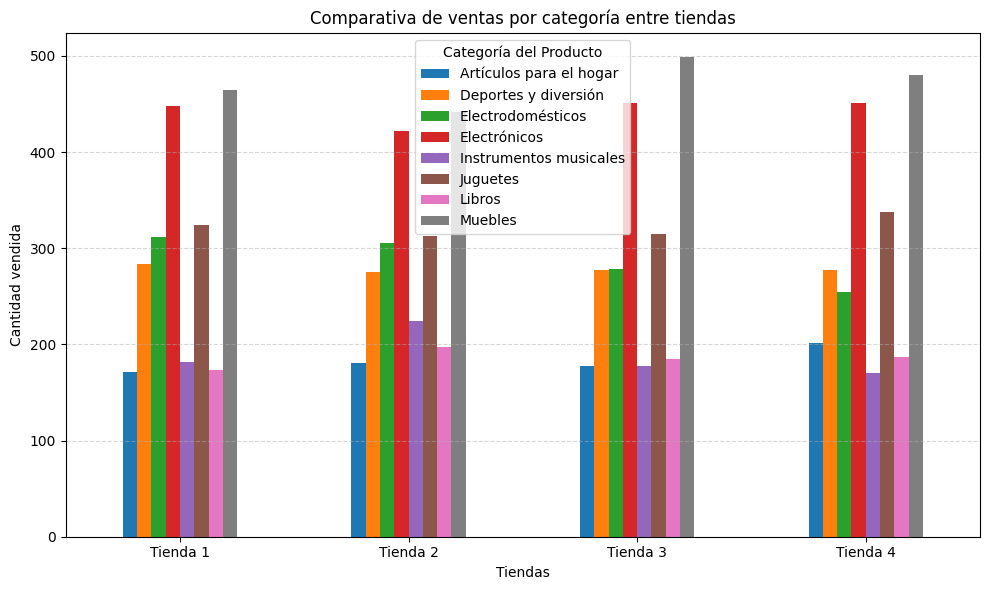

In [6]:
def analizar_ventas_categoria(df, nombres_tiendas, color='cornflowerblue'):

    ventas_por_categoria = df['Categoría del Producto'].value_counts()

    # Crear el gráfico
    plt.figure(figsize=(8, 5))
    ventas_por_categoria.plot(kind='bar', color=color)
    plt.title(f'Ventas por categoría - {nombres_tiendas}')
    plt.xlabel('Categoría')
    plt.ylabel('Cantidad vendida')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

    return ventas_por_categoria

ventas1 = analizar_ventas_categoria(tienda, "Tienda 1", 'salmon')
ventas2 = analizar_ventas_categoria(tienda2, "Tienda 2", 'mediumseagreen')
ventas3 = analizar_ventas_categoria(tienda3, "Tienda 3", 'steelblue')
ventas4 = analizar_ventas_categoria(tienda4, "Tienda 4", 'orchid')

# Creamos un DataFrame con los conteos
df_comparativo = pd.DataFrame({
    'Tienda 1': ventas1,
    'Tienda 2': ventas2,
    'Tienda 3': ventas3,
    'Tienda 4': ventas4
}).fillna(0)  # Rellena con 0 las categorías que no estén en todas

# Transponemos para que las tiendas estén en filas (opcional)
df_comparativo = df_comparativo.T

# Graficamos
df_comparativo.plot(kind='bar', figsize=(10,6))
plt.title("Comparativa de ventas por categoría entre tiendas")
plt.xlabel("Tiendas")
plt.ylabel("Cantidad vendida")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


# 3. Calificación promedio de la tienda


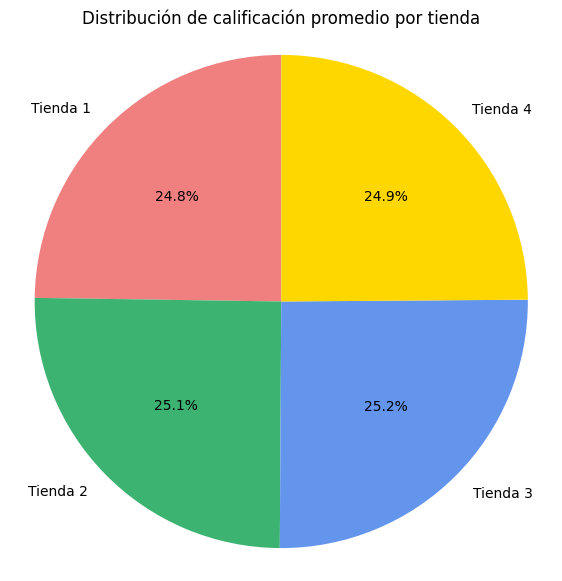

{'Tienda 1': np.float64(3.98),
 'Tienda 2': np.float64(4.04),
 'Tienda 3': np.float64(4.05),
 'Tienda 4': np.float64(4.0)}

In [7]:
def calificaciones_promedio(t1, t2, t3, t4):
    # Calculamos promedio
    prom1 = t1['Calificación'].mean()
    prom2 = t2['Calificación'].mean()
    prom3 = t3['Calificación'].mean()
    prom4 = t4['Calificación'].mean()

    # Almacenamos datos
    nombres = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
    promedios = [prom1, prom2, prom3, prom4]

    # Gráfico de pastel
    plt.figure(figsize=(7,7))
    colores = ['lightcoral', 'mediumseagreen', 'cornflowerblue', 'gold']
    plt.pie(promedios, labels=nombres, colors=colores, autopct='%1.1f%%', startangle=90)
    plt.title("Distribución de calificación promedio por tienda")
    plt.axis('equal')  # Hace el círculo "circular"
    plt.show()

    # También devolvemos los promedios si quieres analizarlos después
    return dict(zip(nombres, [round(p, 2) for p in promedios]))

calificaciones_promedio(tienda, tienda2, tienda3, tienda4)

# 4. Productos más y menos vendidos

# 5. Envío promedio por tienda

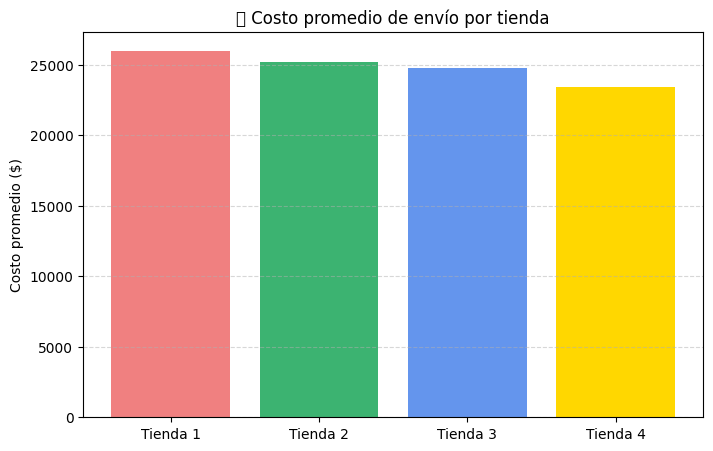

{'Tienda 1': np.float64(26018.61),
 'Tienda 2': np.float64(25216.24),
 'Tienda 3': np.float64(24805.68),
 'Tienda 4': np.float64(23459.46)}

In [29]:
def envio_promedio(t1, t2, t3, t4):
    # Calculamos promedio
    prom1 = t1['Costo de envío'].mean()
    prom2 = t2['Costo de envío'].mean()
    prom3 = t3['Costo de envío'].mean()
    prom4 = t4['Costo de envío'].mean()

    # Almacenamos datos
    nombres = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
    envios = [prom1, prom2, prom3, prom4]

    # Gráfico de barras
    plt.figure(figsize=(8,5))
    colores = ['lightcoral', 'mediumseagreen', 'cornflowerblue', 'gold']
    plt.bar(nombres, envios, color=colores)

    # Estética
    plt.title("📦 Costo promedio de envío por tienda")
    plt.ylabel("Costo promedio ($)")
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.show()

    return dict(zip(nombres, [round(p, 2) for p in envios]))

envio_promedio(tienda, tienda2, tienda3, tienda4)